## 1.	Основные этапы предварительной обработки текстовых данных. Различия между стеммингом и лемматизацией.
Как правило, предварительная обработка текстовых данных включает в себя:

- удаление специальных символов (разные html теги, цифры и т.д)
- токенизацию
- нормализацию
- удаление стоп-слов (знаки препинания и специальные символы; предлоги, союзы;часто употребляемые слова в языке; артикли)

Разница между стеммингом и лемматизацией:
1.	Стемминг работает очень просто - мы обрубаем окончания слов. При этом теряется информация о части речи. Может получиться несуществующее слово.
2. Лемматизация учитывает грамматические правила языка.

## 2. Статистические методы векторизации документов (Bag Of Words, TF-IDF). Формула для вычисления TF-IDF.

1. - Bag Of Words: этот метод представляет документ в виде неупорядоченного набора слов, игнорируя порядок слов в тексте и фокусируясь только на их наличии. Каждое слово становится признаком, и вектор документа создается на основе частоты появления каждого слова.
- Создается словарь слов и из показателей частоты слов получившегося словаря создается матрица В этой матрице каждая строка представляет вектор предложения, длина которого (количество столбцов в матрице) равна размеру словаря.

2. - TF-IDF: этот метод учитывает как частоту слова в документе (TF), так и важность слова для всего корпуса документов (IDF). Слова, которые повторяются слишком часто, не зашумляют другие, менее частотные, но тем не менее важные слова.

- TF = Частотность термина в документе / Общее количество слов в документе
- IDF = log(Общее количество документов/количество документов со словом W)
- TF-IDF = TF * IDF

## 3. Способы выполнения Word2Vec. Архитектуры нейронных сетей. Категориальная перекрестная энтропия и Softmax (формулы).

- CBOW - по контексту предсказать слово в середине
- SkipGram - по слову предсказать контекст

- SkipGram:
Входной слой: слово кодируется бинарным вектором с одной единицей, которая представляет позицию слова в словаре.
Слой Embedding, который представляет собой матрицу размером NxP, где N— размер словаря, P — гиперпараметр, который подбирается эмпирически. В оригинальной статье в качестве размера P используется значение 300.
Выходной слой: слой с размером Nx1, где N — размер словаря, содержит вероятности.

#### Архитектуры нейронных сетей:

Существуют:
1. Многослойный персептрон: Простая архитектура, в которой информация движется от входного слоя к выходному слою через один или несколько скрытых слоев.
2. CNN(Cверточная НС): Широко используется в обработке изображений. Применяет свертку к входным данным, выделяя определенные признаки.
3. RNN(Рекурентная НС): Позволяет учитывать предыдущие состояния при обработке последовательных данных, таких как текст.



#### Категориальная перекрестная энтропия:
$H(p, q) = -\sum\limits_{i=1}^{K}(p_i * log(q_i))$.

p — это фактическое распределение (истинные метки), q - предсказанное распределение (предсказанные вероятности моделью), K — количество классов, $p_i$ - индикатор того, является ли истинная метка $i$-м классом (0 или 1), $q_i$ - предсказанная моделью вероятность принадлежности объекта к классу $i$.

#### Softmax:
$S(y)_i = \frac{exp(y_i)} {\sum\limits_{j=1}^K exp(y_j)}$

Возвращает вероятности принадлежности к классам.

## 4. Схема рекуррентной нейронной сети. Вычисление скрытого состояния в классическом рекуррентном блоке (формула).

1. Входной слой
- Каждый элемент последовательности подается на вход сети на соответствующем временном шаге.
- Если каждый элемент представляется вектором (например, слово в виде вектора word embedding), то каждый элемент последовательности будет вектором.

2. Скрытый слой
- На каждом временном шаге сеть имеет скрытое состояние $h_t$, которое зависит от входа $x_t$ и предыдущего скрытого состояния $h_{t-1}$.
- Перед началом обучение скрытый слой необходимо инициализировать (часто $h_0$ - просто вектор из нулей некоторой размерности).

3. Выходной слой
- На каждом временном шаге сеть может иметь выходной вектор $y_t$, который может использоваться для предсказания или классификации.

Формула вычисления скрытого состояния в классическом рекуррентном блоке:
$h_t = tanh(W_{hh}h_{t-1} + W_{xh}x_t)$

Здесь $W_{hh}$ - это веса связей между состоянием в предыдущем шаге и текущим,
$W_{xh}$ - веса связей между входными данными и текущим состоянием.

## 5. Виды архитектур рекуррентных нейронных сетей и примеры решаемых с их помощью задач.

1. Стандартная RNN (Vanilla RNN):
- Проблема: Стандартные RNN могут сталкиваться с проблемой затухания/взрыва градиента при обучении на длинных последовательностях.
- Примеры задач: Короткие временные последовательности, небольшие тексты.

2. Long Short-Term Memory (LSTM):
- Преимущества: Решает проблему затухания/взрыва градиента, способен учитывать долгосрочные зависимости.
- Примеры задач: Машинный перевод, генерация текста.

3. Gated Recurrent Unit (GRU):
- Преимущества: Аналогично LSTM, более прост в реализации и требует меньше параметров.
- Примеры задач: Машинный перевод, генерация текста.

4. Seq2Seq (Sequence-to-Sequence) - это архитектура нейронных сетей, которая предназначена для преобразования последовательности входных данных в последовательность выходных данных. Модель состоит из двух частей — кодировщик (Encoder) и декодеровщик (Decoder).

    Модели Seq2Seq применяются при решении самых разных задач обработки естественного языка:

    - суммаризация (длинный текст → краткий текст)
    - генерация кода (естественный язык → код Python)
    - генерация текста (начало истории → продолжение истории)
    - машинный перевод

## 6. Сущность и причины возникновения проблемы затухающего градиента при использовании классических рекуррентных блоков. Способы решения проблемы.

Проблема затухающего градиента возникает, когда градиент ошибки, передаваемый назад через слои сети во время обратного распространения ошибки, становится крайне маленьким. Это означает, что веса в начальных слоях нейронной сети обновляются слишком медленно, и обучение этих слоев затруднено.

Градиент по весам $W_{hh}$ на шаге $t$ вычисляется по формуле $\frac{dL_t} {dW_{hh}}$ = $\frac{dL_t} {dh_{t}} * \frac{dh_t} {dh_{t-1}} * ... * \frac{dh_1} {dW_{hh}}$.

Заметим, что $\frac{dh_t} {dh_{t-1}}$ = $tanh'(W_{hh}h_{t-1} + W_{xh}x_t)W_{hh}$.

Так как мы много раз перемножаем производную гиперболического тангенса, которая всегда меньше единицы, то при больших $t$ мы получим многократное перемножение чисел меньших единицы. Значит это произведение будет стремиться к нулю.

Можно предложить вариант использования другой функции потерь, например relu. Ее производная во всех точках кроме нуля равна единице. Это решает проблему затухающих градиентов, но создает новую - проблему взрывающихся градиентов.

Для решения этой проблемы были разработаны различные модификации RNN, такие как LSTM и GRU.

## 7. Современные варианты рекуррентных блоков. Основное отличие между ними. Назвать количество матриц и сдвигов (обучаемые параметры). Какой из блоков имеет меньше обучаемых параметров и почему?

Современные варианты рекуррентных блоков - это LSTM и GRU. Основное отличие - в GRU меньше параметров, чем в LSTM. В LSTM 4 матрицы, 4 сдвига; в GRU 3 матрицы, 3 сдвига. GRU имеет меньше обучаемых параметров, потому что он объединяет "слой фильтра забывания", "слой входного фильтра" из блока LSTM.

- Слой фильтра забывания определяет, какую информацию можно выбросить из состояния ячейки.
- Cлой входного фильтра (input layer gate) определяет, какие значения следует обновить.

## 8. Схема модели для решения задачи нейросетевого машинного перевода (Seq2Seq Encoder-Decoder). Назначение кодировщика и декодировщика. Функция потерь в задаче машинного перевода.

Модель состоит из двух частей — **кодировщик (Encoder)** и **декодеровщик (Decoder)**.

Кодировщик и декодировщик представляют из себя отдельные рекуррентные рекуррентные нейронные сети. **Конечное скрытое состояние кодировщика является начальным состоянием декодировщика.**

Таким образом, кодировщик выполняет извлечение информации о контексте исходного предложения (текста). Формируется конечное скрытое состояние. Декодировщик, используя накопленную информацию о контексте исходного текста, последовательно формирует предложение на целевом языке.

Для каждого текущего токена на исходном языке кодировщик предсказывает (задача классификации) следующий токен на целевом языке.

- Кодировщик: Преобразует входное предложение на исходном языке в контекстный вектор, который представляет собой важную информацию о содержании предложения.
- Декодировщик: Использует контекстный вектор для генерации выходного предложения на целевом языке. Генерация происходит пошагово, начиная с токена начала последовательности, и заканчивается, когда генерируется токен конца последовательности.

Функция потерь в задаче машинного перевода: категориальная кросс-энтропия.
- $H(p, q) = -\sum\limits_{i=1}^{K}(p_i * log(q_i))$.

    p — это фактическое распределение (истинные метки), q - предсказанное распределение (предсказанные вероятности моделью), K — количество классов, $p_i$ - индикатор того, является ли истинная метка $i$-м классом (0 или 1), $q_i$ - предсказанная моделью вероятность принадлежности объекта к классу $i$.


## 9. Особенности обучения и инференса модели нейросетевого машинного перевода. Сущность подхода Teacher Enforcing.

Генерация следующего токена на целевом языке опирается на результат предыдущей генерации.

Поэтому, если модель предскажет неверный токен в середине предложения, все последующие токены будут предсказываться также неверно.

Для устранения этой проблемы применяется подход **Teacher Enforcing**.

Обучение реализуется следующим образом:

- берем текст на исходном языке и прогоняем его через кодировщик
- подаем на первом шаге в декодировщик специальный токен < SOS > (Start of sequence)
- предсказываем с помощью декодировщика первый токен предложения на целевом языке
- используя гиперпараметр Teacher Enforcing (от 0 до 1) случайным образом определяем, будем ли мы далее на вход кодировщику подавать предсказанный ранее токен или будем подавать истинный токен
- продолжаем генерацию

Таким образом, модель будет учиться предсказывать следующие токены не накапливая ошибку.

## 10. Оценка качества машинного перевода. Вычисление BLEU. Почему BLEU не всегда имеет смысл?

Идея тестирования машинного перевода проста: вы создаете обучающий набор с исходными предложениями и их переводом, но оставляете небольшую часть с очень надежными эталонными переводами. После обучения используете эти примеры для тестирования модели.

Одной из часто применяемых метрик качества системы машинного перевода является BiLingual Evaluation Understudy (BLEU).

$BLEU = BP * exp(\sum\limits_{n=1}^{4} \frac 1 n*P_n)$

$P_n = \frac {количество n-грам в предсказанном тексте} {количество n-грам в эталонном переводе}$

$BP = min(1, \frac {длина Перевода} {длина Эталонного Перевода})$

Метрика BLEU не является ориентиром — может существовать несколько правильных переводов.

### Такая формула в лекции:

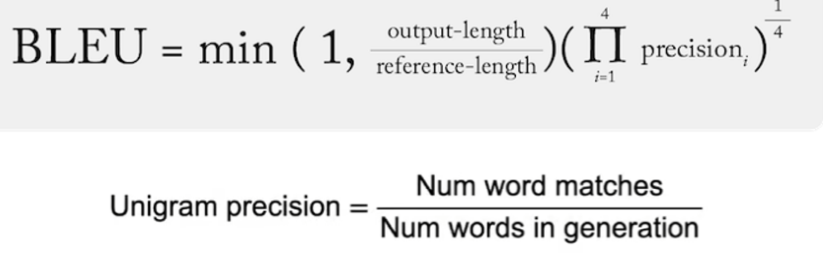


## 11. Назначение и использование механизма внимания при решении задачи машинного перевода. Вычисление Dot Product Attention. Использование внимания для получения предсказаний.

Основная идея механизма внимания: на каждом шаге декодирования использовать связи со всеми скрытыми состояниями кодировщика для того, чтобы фокусироваться (обращать внимание) не только на всю входную последовательность, но и на отдельные подпоследовательности.

Вычисление Dot Product Attention:
- Вычисляем скалярные произведения между текущим состоянием декодировщика и каждым скрытым состоянием кодировщика.
- Получаем n чисел, где n — количество токенов входной последовательности. Применяем softmax.
- Используем полученный в результате применения softmax вектор в качестве коэффициентов и вычисляем взвешенную сумму состояний кодировщика.

 пр. взвешенная сумма: умножаем $i$-ый элемент полученного вектора на $h_i$ и складываем

Вектор, соответствующий взвешенной сумме, конкатенируем с текущим состоянием декодировщика и используем его для получения предсказания.


## 12. Архитектура Transformer. Основное преимущество перед рекуррентными нейронными сетями. Схема трансформера (в общем виде).

- Transformer - это архитектура модели для обработки последовательностей, впервые представленная в статье "Attention is All You Need" (Vaswani et al., 2017).

- Основное преимущество перед рекуррентными нейронными сетями (RNN).

 Параллелизация: Transformer может обрабатывать входные последовательности параллельно, в то время как в рекуррентных сетях обработка происходит последовательно. Это делает Transformer более эффективным на аппаратном уровне и позволяет обрабатывать более длинные последовательности.

- Схема трансформера:
 1. Кодировщик (Encoder).

 - Входная последовательность: Текст подается на вход, и каждое слово представляется эмбеддингом. Позициональные эмбеддинги добавляют информацию о позиции каждого слова в последовательности.

 - Multi-Head Attention: Эмбеддинги слов проходят через слои Multi-Head Attention, позволяя модели фокусироваться на различных аспектах контекста для каждого слова.

 - Полносвязные слои и Нормализация: Результаты проходят через полносвязные слои с применением слоев нормализации.

 2. Декодировщик (Decoder).
Декодировщик использует все те же принципы, что и кодировщик. Есть два отличия:

 - каждый декодировщик **использует информацию с верхнего кодировщика** (запросы и ключи)

 - вместо обычного Self Attention декодировщик реализует Masked Self Attention; по сути - это то же самое, но здесь перед вычислением softmax правый верхний угол матрицы заполняется значениями -inf (симулируется ситуация, что декодировщик в момент обработки t-го токена не знает, какие токены будет дальше, и может сопоставлять t-й токен только с предыдущими).

 - выходной слой: векторы выхода подаются на выходной слой для генерации финального предсказания.

## 13. Позиционное кодирование в трансформерах (с формулами).

Позиционное кодирование в трансформерах добавляет информацию о позиции каждого элемента в последовательности. Так как трансформер не обрабатывает входные данные последовательно, как рекуррентные сети, необходимо вводить позиционную информацию явно.

Позиционное кодирование для каждой позиции $pos$ и каждого индекса $i$ в эмбеддинге выглядит следующим образом:

$PE(pos, 2i)$ = $sin(\frac {pos} {10000^{\frac {2i} d}})$,

$PE(pos, 2i+1)$ = $cos(\frac {pos} {10000^{\frac {2i} d}})$,

$pos$ - позиция элемента в исходной последовательности
$i$ - позиция в эмбеддинге слова
$d$ - размерность эмбеддинга.

Теперь модели не обязательно знать номер текущего токена для того, чтобы определить на сколько далеко или близко к нему располагаются другие токены входной последовательности.

## 14. Самовнимание в трансформерах (с формулами).

Идея самовнимания следующая - для каждого слова оценить влияние на него других слов. Влияние конечно же будем оценивать при помощи скалярного произведения.

Пусть у нас есть последовательность эмбеддингов $X=[x_1, x_2,...x_n]$, где $n$ - длина последовательности.

1. В самом начале инициализируем матрицы запросов, ключей, значений:
 - $Q=X$
 - $K=X$
 - $V=X$

2. $Attention(Q, K, V) = softmax(\frac {QK^T} {\sqrt d_k})V$

Видим, что получившаяся матрица имеет такой же размер, как и входная. Слой Self Attention не изменяет размеры входных данных.

## 15. Постановка задачи тематического моделирования (формула, некорректность постановки по Адамару).

Тематическое моделирование - это задача выделения тем и определения тематического профиля каждого документа по наблюдаемому распределению $p(w|d)$ (это частота слова в документе). Можно заметить, что тематическое моделирование сильно напоминает задачу кластеризации текстовых документов.

Идея состоит в том, чтобы поставить задачу генерации текста (моделирования языка): $p(w|d)=\sum_{t\in{T}}p(w|t)p(t|d)$

Поскольку мы не знаем вероятности $p(w|t)$ и $p(t|d)$, мы можем рассматривать их как параметры распределения $p(w|d)$. Введем обозначения: $\phi_{wt}=p(w|t)$, $\theta_{td}=p(t|d)$.

Тогда $p(w|d)=\sum_{t\in{T}}\phi_{wt}\theta_{td}$ и имеем задачу стохастического матричного разложения:

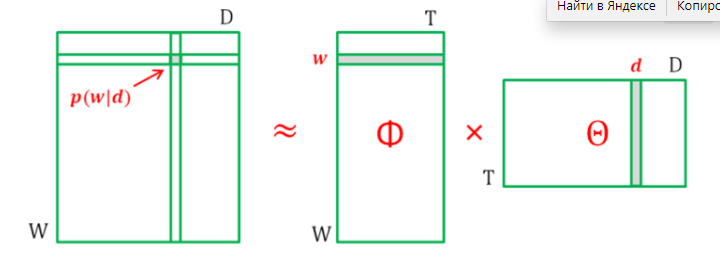

Запишем правдоподобие (совместное распределение всей выборки) и поставим задачу его максимизации:

$\prod_{d\in{D}}\prod_{w\in{d}}p(w|d)^{n_{dw}}\rightarrow{max}$ - задача является некорректно поставленной по Адамару (решение на самом деле не единственное, их бесконечное множество)

## 16. EM-алгоритм в общем виде с регуляризаторами (с формулами).

**EM-алгоритм в общем виде** выглядит следующим образом:

E-шаг:

$p_{tdw}=p(t|d,w)=norm_{t\in{T}}(\phi_{wt}\theta_{td})$

M-шаг


$\phi_{wt}=norm_{w\in{W}}(\sum_{d\in{D}}n_{dw}p_{tdw}+\phi_{wt}\frac{\partial{R}}{\partial{\phi_{wt}}})$

$\theta_{td}=norm_{t\in{T}}(\sum_{w\in{d}}n_{dw}p_{tdw}+\theta_{td}\frac{\partial{R}}{\partial{\theta_{td}}})$

## 17. LDA. Идея, вид регуляризатора, M-шаг.

Наиболее популярный алгоритм LDA основан на идее генерации столбцов искомых матриц с помощью распределения Дирихле, которое задается двумя параметрами. Корректируя значения этих параметров, мы можем получать различные тематические профили и наборы тем.

LDA (Latent Dirichlet allocation) на языке регуляризаторов описывается следующим образом:


$R(\Phi,\Theta)=\sum_{t,w}(\beta_w-1)ln\phi_{wt}+\sum_{d,t}(\alpha_t-1)ln\theta_{td}$

Очевидным образом получаем формулы для M-шага:

$\phi_{wt}=norm_{w\in{W}}(\sum_{d\in{D}}n_{dw}p_{tdw}+\beta_w-1)$

$\theta_{td}=norm_{t\in{T}}(\sum_{w\in{d}}n_{dw}p_{tdw}+\alpha_t-1)$

## 18. Основные регуляризаторы для сглаживания, разрежения и декорреляции распределений (с формулами).

Сглаживание используется для предотвращения переобучения и уменьшения разреженности параметров модели.

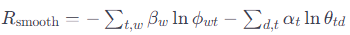

Регуляризатор разреживания (sparsity):

Идея: Разреживание используется для создания более разреженных распределений параметров, что может привести к интерпретируемости и улучшению обобщения.

image.png

Регуляризатор декорреляции

Идея: Декорреляция используется для уменьшения взаимозависимости между темами, что может привести к более четким и различимым темам.

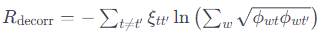

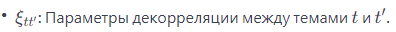

## 19. Оценка качества тематических моделей. Перплексия (с формулой). Особенность расчета перплексии для тестовой выборки (с формулой)

Перплексия - это мера оценки качества тематических моделей, и она измеряет, насколько хорошо модель предсказывает наблюдаемые данные (тексты). Чем ниже перплексия, тем лучше.

$P(D)=exp(-\frac{1}{n}\sum_{d\in{D}}\sum_{w\in{d}}n_{dw}ln(p(w|d))), n = \sum_{d\in{D}}\sum_{w\in{d}}n_{dw}$

При расчете перплексии для тестовой выборки, мы учитываем, что модель обучена на тренировочной выборке. Для вычисления перплексии нам нужна матрица  Θ  для тестирующей выборки.

$P(D)=exp(-\frac{1}{n''}\sum_{d\in{D'}}\sum_{w\in{d''}}n_{dw}ln(p(w|d))), n'' = \sum_{d\in{D}}\sum_{w\in{d''}}n_{dw}$

$d=d'\cup{d''}$ - случайное разбиение текстового документа d на 2 равные части; матрица $\Theta$ вычисляется по $d'$.

## 20. Алгоритмы Bertopic и KeyBERT.

1. Bertopic - это библиотека для тематического моделирования, основанная на BERT (Bidirectional Encoder Representations from Transformers). Этот метод позволяет строить тематические модели на основе предварительно обученной модели BERT для извлечения тем из текстовых данных.

Основные шаги работы с Bertopic:

Предобработка данных:

Текстовые данные подаются в библиотеку Bertopic.
Векторизация текста:

Производится векторизация текста с использованием предварительно обученной модели BERT.
Построение тематической модели:

Тематическая модель строится на основе кластеризации векторизованных представлений текста.
Интерпретация тем:

Для каждого кластера извлекаются ключевые слова, представляющие тему.
Оценка результатов:

Производится оценка и интерпретация полученных тематических кластеров.

2. KeyBERT:

KeyBERT - это библиотека для извлечения ключевых слов из текстовых данных с использованием BERT-подобных моделей. Она позволяет эффективно извлекать ключевые слова для поддержки различных задач обработки текста.

Основные шаги работы с KeyBERT:

Подготовка текста:

Текстовые данные подаются в библиотеку KeyBERT.
Извлечение ключевых слов:

Производится извлечение ключевых слов с использованием BERT-подобной модели.